In [85]:
import numpy as np

In [86]:
# Utility functions to simplify tasks and assist with debugging
from logger import *
import custom_plotter as plotter

---
# Naive Bayes

# Introduction Classification

---
In the previous assignment, we developed a classifier using logistic regression, which is rooted in the principles of regression analysis. Classification models, however, can also be based on other fundamental principles such as probability calculations (probabilistic models) and entropy (tree models). In this assignment, we will delve into these two principles. A thorough understanding of entropy and probability is crucial for mastering more advanced algorithms. Specifically, we will explore the fundamentals of the Naive Bayes and ID3 algorithms. This exploration will provide a solid foundation for more complex topics in machine learning and data science.

This notebook consists the following parts:

- [A: Data preparation](#01)
- [B: Implementation of Naive bayes](#02)
- [C: BONUS: Implementation of Bernouilli](#03)
- [D: Evaluate your own implementation with library model](#04)
- [E: Implementation of ID3 algorithm](#05)
- [F: Compare library decision tree with ID3 algorithm](#06)
- [G: BONUS: split on treshold](#07)
- [H: BONUS: implement KNN](#07)

---

### Learning Objectives
By the end of this two-week period, you will be able to:
- Understand the fundamental concepts of probabilistic and entropy-based classification models.
- Grasp the construction and significance of probability calculations in Naive Bayes and entropy measures in ID3.
- Understand classification performance metrics and their impact on the models.
- Translate theoretical concepts of Naive Bayes and ID3 into functional code.
- Articulate the appropriate use cases for Naive Bayes and ID3 classification algorithms.
- Build your own Naive Bayes and ID3 classification models from scratch, implementing methods for fitting the model and making predictions.

---

### Instructions
- Read this notebook first
  - Ensure you fully understand the requirements and objectives of the assignment.
  - If you need additional context or clarification, please check the provided videos or background literature.

- Work through each part of the assignment methodically, ensuring all tasks are completed. 
  - Comment on code sections to explain the logic and choices made during implementation. 
  - Record experiments, parameter settings, and results to support reproducibility and future improvements.
  - Use metrics like accuracy, precision, recall, F1-score, ROC and confusion matrix to assess model performance
  - Use techniques like train-test split or cross-validation to evaluate the model
  - Improve model performance by transforming or engineering features to better fit the assumptions of the model  
  - Analyze the impact of different feature selections and transformations

- Using the code from the tasks A to E, create **python files** with classes that model data using NB and ID3. This class should include the following methods:
  - `fit()`: A method to fit the model to the training data, determining the algorithm.
  - `predict()`: A method to predict the outcome for new input data using the trained model.

- Submit a repository with a directory `classification` that includes:
  - This finished notebook and supportive code snippets
  - The code solutions (python files) that contain the classifier code. Consider to use an abstract base class that is extended by specific classifiers. Deliver code solutions for:  
    - The Gaussian Naive Bayes classifier
    - The Bernouilli Naive Bayes classsifier (optional)
    - The ID3 classifier
  - An evaluation document that details specific scenarios or datasets where each developed type is appropriate or inappropriate.


### Additional Notes:
- Do not add datafiles to your repository. Repositories with datafiles will not be accepted
- Class solutions should be delivered in python files. Not in notebooks
- When AI tools are used, you must provide proper references and explanations for how they were utilized. Failure to do so will be considered as academic fraud
- The bonus assignments (C, G, H) are not mandatory
- Use PEP8 

Good luck!

F.Feenstra




---
<a name='01'></a>
## Part A. Data preparation 

### Use case Gaussian Naive Bayes 
The Gaussian Naive Bayes algorithm can be effectively demonstrated using the well-known Iris dataset. This dataset can be downloaded and prepared using the following code:

```{python}
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #reserve 30% of the data for testing
```

---

In [87]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
y = y_train
P0 = len(y[y == 0]) / len(y)
P0

0.29523809523809524

In [89]:
try: 
    # your code here to load the iris dataset and prepare X_train, X_test, y_train, y_test
    # begin solution
    # end solution
    print(X.shape, y.shape)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
except: 
    print('load the data properly')
finally:
    print('Expected shape X, y:\n (150, 4) (150,)')
    print('Expected shape X_train, X_test, y_train, y_test:\n (105, 4) (45, 4) (105,) (45,)')


(150, 4) (105,)
(105, 4) (45, 4) (105,) (45,)
Expected shape X, y:
 (150, 4) (150,)
Expected shape X_train, X_test, y_train, y_test:
 (105, 4) (45, 4) (105,) (45,)


---
<a name='02'></a>
## Part B. Implementation of Naive bayes 


**Naive Bayes** is a probabilistic classifier based on Bayes' Theorem. It assumes independence among features given the class label, which simplifies the computation of probabilities.

**Bayes' Theorem** states:
$ P(C \mid X) = \frac{P(X \mid C) \times P(C)}{P(X)} $

Where:
- $P(C \mid X)$ is the posterior probability of class $C$ given feature vector $X$.
- $P(X \mid C)$ is the likelihood of feature vector $X$ given class $C$.
- $P(C)$ is the prior probability of class $C$.
- $P(X)$ is the evidence

There are three main types of Naive Bayes models. 
- Gaussian Naive Bayes: Assumes features follow a normal distribution (used for continuous data).
- Multinomial Naive Bayes: Asumes discrete features.
- Bernoulli Naive Bayes: Assumes binary/boolean features.

See also https://en.wikipedia.org/wiki/Naive_Bayes_classifier


### Steps to Implement Naive Bayes

#### Step 1: Calculate Probabilities
- **Prior Probability $P(C)$**: The proportion of each class in the training set.
  
 $$P(C) = \frac{\text{Number of instances of class } C}{\text{Total number of instances}}$$

#### Step 2: Calculate Likelyhood

- **Likelihood $P(X \mid C)$**: 
  - For **Gaussian Naive Bayes**: Calculate mean ($\mu$) and standard deviation ($\sigma$) for each feature per class and use those for 
    
    $$P(x_i \mid C) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)$$

  - For **Multinomial/Bernoulli Naive Bayes**: Count occurrences or presence/absence of features per class and apply Laplace smoothing.
    See also https://video.hanze.nl/media/naive+bayes/0_j8w7lydm

#### Step 3: Apply Bayes' Theorem
- For each class, compute the posterior probability:
  
  $$P(C \mid X) \propto P(X \mid C) \times P(C)$$

- Choose the class with the highest posterior probability.


  


### <span style="background-color: lightyellow;">Implementation Task</span>
- complete the functions `get_labels()`, `get_priors()` and `classify()`for the gaussian naive bayes model and use the test code to check the outcomes.
- BONUS: create another classify function or classifier class that uses the Bernoulli implementation with laplace correction. Select an appropiate dataset to test the model.


In [90]:
def get_labels(y_train):
    """ Extract unique class labels from the training data """
    # YOUR CODE HERE
    labels = np.unique(y_train)
    return labels

def get_priors(labels):
    """ Calculate prior probabilities for each unique label """
    ## For each unique label in labels:
    ##     Count the number of occurrences of the current label in labels
    ##     Divide the count by the total number of labels to get the prior probability
    ##     Append the prior probability to the priors list
    ##     Return the list of priors
    ## YOUR SOLUTION HERE
    priors = [ ]
    for i in labels:
        Pi = len(y[y == i]) / len(y)      
        priors.append(Pi)
    return priors

try:
    labels = get_labels(y_train)
    print(labels)
    print(get_priors(labels))
except Exception as error:
    print(f'implement functions error free: {error}')
finally:
    print('output should be three labels [0, 1, 2] each a prior of 33%')


[0 1 2]
[0.29523809523809524, 0.3523809523809524, 0.3523809523809524]
output should be three labels [0, 1, 2] each a prior of 33%


In [91]:
def get_likelihoods(X_train, y_train):
    """ calculate mean and stdev matrices size (n_labels, n_features)"""
    
    #    Initialize mu as a 2D array of zeros with dimensions (number of labels, n)
    #    Initialize sd as a 2D array of zeros with dimensions (number of labels, n)
    #    For each label i from 0 to the number of unique labels:
    #        Find the indices idx where y_train equals the current label
    #        For each feature j from 0 to n:
    #            Calculate the mean of the feature j for instances with label i and store it in mu[i][j]
    #            Calculate the standard deviation of the feature j for instances with label i and store it in sd[i][j]
    #    Return the matrix with means and the matrix with stdevs 

    ## YOUR SOLUTION HERE
    n = X_train.shape[1]
    labels = np.unique(y_train)
    m = len(labels)
    mu = np.zeros((m,n))
    sd = np.zeros((m,n))
    for i in labels:
        for j in range(n):
            mu[i][j] = np.mean(X_train[y_train==i,j])
            sd[i][j] = np.std(X_train[y_train==i,j])
    return mu,sd             

try: 
    mu, sd = get_likelihoods(X_train, y_train)
    print('non scaled outcome with 30% split\n')
    print(f'n_classes = {len(get_labels(y_train))}, n_features = {X_train.shape[1]}\n')
    print(f'means matrix (n_classes (labels) x n_features)\n{mu}')
    print(f'\nstdevs matrix (n_classes (labels) x n_features)\n{sd}')
except Exception as error:
    print(f'something goes wrong, finish implementation. {error}')
finally:
    output = f"""
    means matrix (n_classes (labels) x n_features)
    [[4.96451613 3.37741935 1.46451613 0.2483871 ]
     [5.86216216 2.72432432 4.21081081 1.3027027 ]
     [6.55945946 2.98648649 5.54594595 2.00540541]]

    stdevs matrix (n_classes (labels) x n_features)
    [[0.33461426 0.36957663 0.18236508 0.10737624]
     [0.52471426 0.29537462 0.48922652 0.20333236]
     [0.64993116 0.31032865 0.53705634 0.29311555]]
    """
    print(f'\nExpected outcome: \n{output}')



non scaled outcome with 30% split

n_classes = 3, n_features = 4

means matrix (n_classes (labels) x n_features)
[[4.96451613 3.37741935 1.46451613 0.2483871 ]
 [5.86216216 2.72432432 4.21081081 1.3027027 ]
 [6.55945946 2.98648649 5.54594595 2.00540541]]

stdevs matrix (n_classes (labels) x n_features)
[[0.33461426 0.36957663 0.18236508 0.10737624]
 [0.52471426 0.29537462 0.48922652 0.20333236]
 [0.64993116 0.31032865 0.53705634 0.29311555]]

Expected outcome: 

    means matrix (n_classes (labels) x n_features)
    [[4.96451613 3.37741935 1.46451613 0.2483871 ]
     [5.86216216 2.72432432 4.21081081 1.3027027 ]
     [6.55945946 2.98648649 5.54594595 2.00540541]]

    stdevs matrix (n_classes (labels) x n_features)
    [[0.33461426 0.36957663 0.18236508 0.10737624]
     [0.52471426 0.29537462 0.48922652 0.20333236]
     [0.64993116 0.31032865 0.53705634 0.29311555]]
    


---
<a name='03'></a>
## Part C. Evaluate your own implementation with Library model
There are several libraries available for machine learning models, such as Scikit-learn, TensorFlow, Keras and PyTorch. Scikit-learn is useful for simple models such as Naive Bayes. Read more about Gaussian Naive Bayes [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

### Evaluate with accuracy
The cell code below prints the accuracy of your developed model. Compare the accuracy of your model with the accuracy of the Gaussian Naive Bayes model from sklearn. You can extend the evaluation with other metrcis. See also https://video.hanze.nl/media/model-evaluation/0_gybpnhq7. Mind you that week 5 and 6 will cover more evaluation techniques







In [92]:
def evaluateNB(y_test, y_pred):
    match = 0
    for i in np.arange(0,len(y_test)):
        if y_test[i] == y_pred[i]:
            match = match + 1
    acc = match / len(y_test)
    return acc

## YOUR CODE HERE TO compare your model with the model from a library like sklearn
from sklearn.naive_bayes import GaussianNB

def predict_proba(X):
    '''Compute Gaussian Naive Bayes probabilities via likelihoods.'''
    Pyx = list()
    for c in range(len(labels)):
        Pxy = np.exp(-0.5 * (X - mu[c]) ** 2 / (sd[c]**2)) / np.sqrt(2.0 * np.pi * (sd[c]**2))
        Py = np.mean(y == labels[c])
        Pyx.append(Pxy.prod(axis=1) * Py)
    Pyx = np.array(Pyx).T
    return Pyx / Pyx.sum(axis=1, keepdims=True)

y_proba = predict_proba(X_test)

y_hat = labels[np.argmax(y_proba, axis=1)]

acc = evaluateNB(y_test, y_hat)
acc

0.9777777777777777

In [93]:
y_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

### Bonus: Evaluate with decision boundary

A decision boundary is a region in the feature space where the model's predicted classification changes from one class to another. It is the threshold at which the model is equally uncertain about which class a data point belongs to. The goal is to find a decision boundary that not only separates the training data well but also generalizes to unseen data. A decision boundary that is too complex might capture noise in the data (overfitting), while a too-simple boundary might miss important patterns (underfitting). Class imbalance can skew the decision boundary, making it biased towards the majority class. 

To plot the decision boundary, first create a class that includes `fit()` and `predict()` methods. Ensure that the appropriate code snippets are included in the `fit()` method to train the model and in the `predict()` method to make predictions. Modify your code snippets as needed to ensure they are compatible with the class implementation. 



/Users/hezhipeng/Desktop/venv/DS/ML/custom_plotter.py:124: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 2], X_test[:, 3], c=y_test, edgecolors='black', marker='x', cmap=plt.cm.RdYlBu, label='Test')


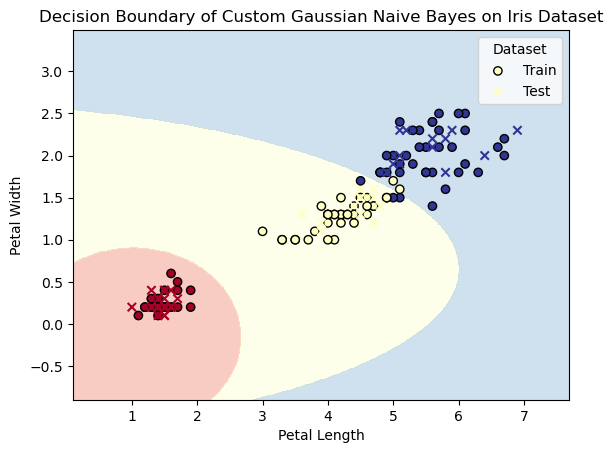

In [94]:
# Custom Gaussian NB classifier example (replace this with your actual classifier)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
rgb_map = ListedColormap(('r', 'm', 'b'))

class CustomGaussianNB:
    def __init__(self):
        self.labels = None
        self.mu = None
        self.sd = None
        self.priors = None

    def fit(self, X_train, y_train):
        """Fit the model to training data"""
        self.labels = self.get_labels(y_train)
        self.priors = self.get_priors(y_train)
        self.mu, self.sd = self.get_likelihoods(X_train, y_train)
        return self

    def get_labels(self,y_train):
        """ Extract unique class labels from the training data """
        labels = np.unique(y_train)
        return labels
    
    def get_priors(self,y_train):
        """ Calculate prior probabilities for each unique label """
        priors = []
        total_samples = len(y_train)
        for label in self.labels:
            Pi = np.sum(y_train == label) / total_samples
            priors.append(Pi)
        return priors
    
    def get_likelihoods(self, X_train, y_train):
        """ Calculate mean and stdev matrices size (n_labels, n_features) """
        n_features = X_train.shape[1]
        n_labels = len(self.labels)
        mu = np.zeros((n_labels, n_features))
        sd = np.zeros((n_labels, n_features))
        for idx, label in enumerate(self.labels):
            for j in range(n_features):
                mu[idx][j] = np.mean(X_train[y_train == label, j])
                sd[idx][j] = np.std(X_train[y_train == label, j])
        return mu, sd  

    def predict_proba(self,X_test):
        '''Compute Gaussian Naive Bayes probabilities via likelihoods.'''
        Pyx = []
        for c in range(len(self.labels)):
            Pxy = np.exp(-0.5 * (X_test - self.mu[c]) ** 2 / (self.sd[c]**2)) / np.sqrt(2.0 * np.pi * (self.sd[c]**2))
            Py = self.priors[c]
            Pyx.append(Pxy.prod(axis=1) * Py)
        Pyx = np.array(Pyx).T
        return Pyx / Pyx.sum(axis=1, keepdims=True)
    
    def predict(self, X_test):
        """ Predict class labels for the test data """
        return np.argmax(self.predict_proba(X_test), axis=1)
    
def plot_decision_boundary(classifier, X_train, y_train, X_test, y_test):
    # Define grid boundaries using the two features in X_train
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150),
                         np.linspace(y_min, y_max, 150))
    # Prepare input for prediction
    XX = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(XX)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=rgb_map)
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=rgb_map)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='o', marker='x', cmap=rgb_map)
    plt.colorbar(scatter)
    plt.title("Decision Boundary with Custom Gaussian Naive Bayes")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
        
# Fit the classifier on all features
classifier = CustomGaussianNB()
classifier.fit(X_train, y_train)
plotter.decision_boundery(classifier, X_train, y_train, X_test, y_test)
    

---
# ID3
---
### Use case ID3
For the ID3 algorithm evaluation we will use the [METABRIC](https://www.cbioportal.org/study/summary?id=brca_metabric) dataset from [cBioportal](https://www.cbioportal.org/). This breast cancer dataset contains clinical features. The aim is to predict survival class (vital status). For the development of the algorithm we prepared a small dataset derived from the METABRIC dataset. The dataset is called `sample.txt` and can be downloaded 
[here](https://bioinf.nl/~fennaf/DSLS/ML/sample.txt)

Once the algorithm is validated you can use the full METABRIC dataset from bioportal.


--- 
<a name='04'></a>
## Part D. Implementation of ID3 algorithm

The ID3 algorithm (Iterative Dichotomiser 3) is an algorithm used for constructing decision trees, which are commonly used in machine learning for classification tasks. A decision tree can be visualized as a flowchart-like structure where each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label. The ID3 algorithm is basis to more advanced decision tree algorithms such as C45. The algorithm selects the features that best separates the data based on a measure called **information gain**. Information gain is calculated using the concept of **entropy** from information theory. Entropy measures the impurity or uncertainty in a dataset, Information Gain measures the reduction in entropy after splitting a dataset based on an feature (attribute). The higher the Information Gain, the more informative the feature is for classification.

### Entropy

$$\text{Entropy} = -\sum_{i=1}^{n} p_i \cdot \log(p_i)$$

where:

- $p_i$ represents the individual probabilities in the distribution.
- The summation is taken over all probabilities $p_i$ where $p_i > 0$ ($p_i > 0$ avoids undefined operations for $\log(0)$)

The choice of base for $log$ varies for different applications. Base 2 gives the unit of bits (or "shannons"), while base e gives "natural units" nat, and base 10 gives units of "dits", "bans", or "hartleys". 
https://en.wikipedia.org/wiki/Entropy_(information_theory)


### Information Gain in Decision Trees

In the context of decision trees, Information Gain is used to determine the best feature to split the data at each node. The feature with the highest Information Gain is selected for the split.

1. **Calculate the entropy of the entire dataset**:
   $$\text{Entropy}(D) = -\sum_{i=1}^{n} p_i \cdot \log(p_i)$$
   where $p_i$ is the probability of class $i$ in the entire dataset $D$.

2. **For each attribute $A$**:
   - Calculate the entropy for each subset $D_v$ (where $v$ is a possible value of $A$):
     $$\text{Entropy}(D_v) = -\sum_{i=1}^{n} p_{iv} \cdot \log(p_{iv})$$
     where $p_{iv}$ is the probability of class $i$ in subset $D_v$.
   - Calculate the weighted sum of the entropies of all subsets:
     $$\sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} \cdot \text{Entropy}(D_v)$$
     where $|D_v|$: The number of elements in subset $D_v$ and $|D|$: The total number of elements in dataset $D$
     

3. **Calculate the Information Gain for attribute \( A \)**:
   $$\text{IG}(A) = \text{Entropy}(D) - \sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} \cdot \text{Entropy}(D_v)$$
   where $\text{Values}(A)$: The set of all possible values that attribute $A$ can take


### ID3 algorithm

1. select best feature based on information gain
2. create a node for the selected feature
3. split the data into subsets based on the possible values of the selected feature
4. recursive apply algorithm on each subset, select next best feature until all samples in subset belong to a class or there are no more features
5. use manority voting for class if several class labels remain in a subset


NB: 
- to prevent overfitting you can set a max_depth, like pruning a tree.


Quinlan, J. R. 1986. Induction of Decision Trees. Mach. Learn. 1, 1 (Mar. 1986), 81–106

### <span style="background-color: lightyellow;">Implementation Task</span>
- Download the `sample.txt` dataset [here](https://bioinf.nl/~fennaf/DSLS/ML/sample.txt)
- Complete the `entropy()`, `information_gain()`, and `ID3()` functions. Feel free to add additional functions if necessary to enhance the implementation. 
- Consider to adjust the code with a `max_depth` property.
- Use the code snippets to create your own ID3 classifier. This we will use in part E and F.



#### Expected outcome 
The expected outcome using `sample.txt` (without splitting) for the initial gain calculations is as follows:

```{python}
	Entropy of the target (Vital Status): 0.97
	feature Histological Type gain 0.00
	feature Grade gain 0.02
	feature Tumor Stage gain 0.07
	feature ER Status gain 0.02
	best feature: Tumor Stage
```

The result of the ID3 algorithm is a nested dictionary with the best features and the targets like this
```
{'Tumor Stage': {'stage iii': {'Histological Type': {'ilc': 'alive', 'other': 'dead', 'idc': 'alive'}}, 'stage i': {'Histological Type': {'ilc': 'dead', 'mixed type': 'dead', 'other': 'alive', 'idc': 'alive'}}, 'stage iv': {'Histological Type': {'ilc': 'alive', 'idc': 'dead'}}, 'stage ii': {'Grade': {'grade 2': 'alive', 'grade 3': 'dead'}}}}
```
Which can be represented in a tree using the `plotter.print_tree(decision_tree)` function
```{python}
	Decision Tree:
	Tumor Stage
		stage iii -> 		
			Histological Type
				ilc -> 				alive
				other -> 			dead
				idc -> 				alive
		stage i -> 		
			Histological Type
				ilc -> 				dead
				mixed type -> 			dead
				other -> 			alive
				idc -> 				alive
		stage iv -> 		
			Histological Type
				ilc -> 				alive
				idc -> 				dead
		stage ii -> 		
			Grade
				grade 2 -> 			alive
				grade 3 -> 			dead

```
A more fancy plot can be created using the `plotter.create_plot(decision_tree)` function
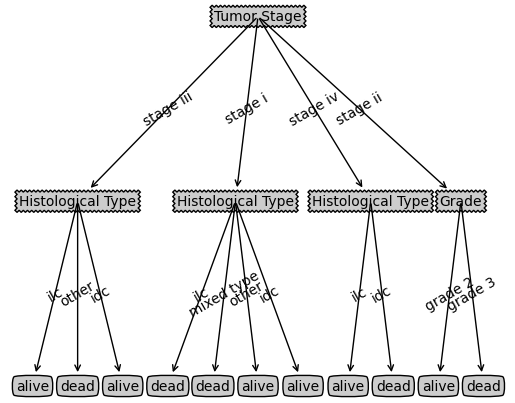

### Bonus
Use networkX to present the tree in a graph 

In [95]:
# YOUR CODE HERE TO IMPORT THE SAMPLE.TXT DATASET
import pandas as pd
data = pd.read_csv('sample.txt',sep='\t')
data.head(5)

,Histological Type,Grade,Tumor Stage,ER Status,Vital Status
0,ILC,Grade 3,Stage III,Positive,Alive
1,ILC,Grade 2,Stage I,Negative,Dead
2,Mixed Type,Grade 3,Stage I,Negative,Dead
3,Other,Grade 1,Stage I,Negative,Alive
4,ILC,Grade 2,Stage IV,Negative,Dead


Entropy of the target (Vital Status): 0.9709505944546686
Entropy of the frature (Histological Type): 0.0029010745071728072
Entropy of the frature (Grade): 0.01997309402197489
Entropy of the frature (Tumor Stage): 0.06595732094917495
Entropy of the frature (ER Status): 0.01997309402197489
Decision Tree:
Tumor Stage
	Stage III -> 		Histological Type
			ILC -> 				Alive
			Other -> 				Dead
			IDC -> 				Alive
	Stage I -> 		Histological Type
			ILC -> 				Dead
			Mixed Type -> 				Dead
			Other -> 				Alive
			IDC -> 				Alive
	Stage IV -> 		Histological Type
			ILC -> 				Dead
			IDC -> 				Dead
	Stage II -> 		Grade
			Grade 2 -> 				Alive
			Grade 3 -> 				Dead


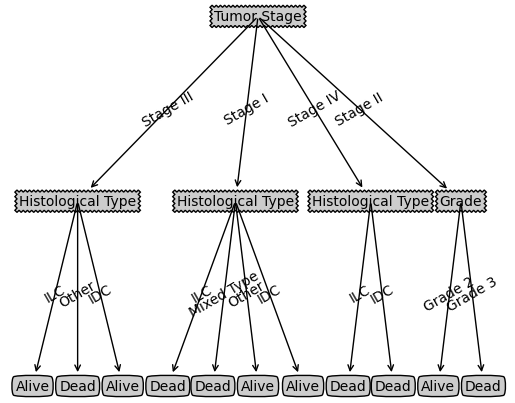

In [96]:
# YOUR CODE HERE
from collections import Counter
from math import log2

def entropy(y):
    # Calculate the entropy of a distribution for the classes in the target variable (y).
    # probs are the frequency of each class relative to the total number of labels (classes)
    # Entropy of the target (Vital Status) using sample.txt (no splitting) (using log2 as a base): 0.97 
    classes = np.unique(y)
    y = np.array(y)
    y_onehot = (y[:, np.newaxis] == classes)
    p = y_onehot.mean(axis=0)
    return np.sum(-p * np.log2(np.maximum(p, 1e-100)))

def information_gain(data, feature, target):
    # Calculate the information gain of partitioning the data by a specific feature
    # Information gain is the difference between the original entropy and the partition_entropy(subsets)
    # initial gain calculation feature Histological Type gain 0.00
    # initial gain calculation feature Grade gain 0.02
    # initial gain calculation feature Tumor Stage gain 0.07
    # initial gain calculation feature ER Status gain 0.02
    # X = data.iloc[:,:-1]
    # y = np.array(data.iloc[:,target])
    # Calculate initial entropy of the target variable
    initial_entropy = entropy(np.array(data[target]))
    subsets = data.groupby(feature)
    total_size = len(data)
    weighted_entropy = 0
    for _, subset in subsets:
        subset_entropy = entropy(np.array(subset[target]))
        weighted_entropy += (len(subset) / total_size) * subset_entropy
    return initial_entropy - weighted_entropy

def information_gain(data, feature, target):
    # Calculate the information gain of partitioning the data by a specific feature
    # Information gain is the difference between the original entropy and the partition_entropy(subsets)
    # initial gain calculation feature Histological Type gain 0.00
    # initial gain calculation feature Grade gain 0.02
    # initial gain calculation feature Tumor Stage gain 0.07
    # initial gain calculation feature ER Status gain 0.02
    # ##############
    # Calculate initial entropy of the target variable
    initial_entropy = entropy(np.array(data[target]))
    subsets = data.groupby(feature)
    total_size = len(data)
    weighted_entropy = 0
    for _, subset in subsets:
        subset_entropy = entropy(np.array(subset[target]))
        weighted_entropy += (len(subset) / total_size) * subset_entropy
    return initial_entropy - weighted_entropy
                  
def id3(data, features, target, depth=0, max_depth=None):
    # ID3 algorithm to create a decision tree with max depth

    #1. select best feature based on information gain to split on (first split should be on Tumor Stage)
        # Stop if the best gain is 0 (no further information can be gained)
        
    #2. create a node for the selected feature
    #3. split the data into subsets based on the possible values of the selected feature
    #4. recursive apply algorithm on each subset, select next best feature until all samples in subset belong to a class or there are no more features
        # If no features are left, return the most common target value
        # Stop if the max depth is reached    
    
    #5. use majority voting for class if several class labels remain in a subset
        # If all data points have the same target value, return that value
        
    # Expected result to return: 
    # {'Tumor Stage': {'stage iii': {'Histological Type': {'ilc': 'alive', 'other': 'dead', 'idc': 'alive'}}, 
    #                  'stage i': {'Histological Type': {'ilc': 'dead', 'mixed type': 'dead', 'other': 'alive', 'idc': 'alive'}}, 
    #                  'stage iv': {'Histological Type': {'ilc': 'alive', 'idc': 'dead'}}, 
    #                  'stage ii': {'Grade': {'grade 2': 'alive', 'grade 3': 'dead'}}
    #                 }
    # }
    # Stop if all samples belong to the same class
    if len(set(data[target])) == 1:
        return data[target].iloc[0]
    # Stop if max depth is reached
    if max_depth is not None and depth >= max_depth:
        return Counter(data[target]).most_common(1)[0][0]
    # Step 1: Calculate information gain for each feature
    gain_in_features = {}
    for feature in features:
        gain_feature = information_gain(data, feature, target)
        gain_in_features[feature] = gain_feature
    # Select the best feature based on information gain
    best_feature = max(gain_in_features, key=gain_in_features.get)
    initial_entropy = entropy(np.array(data[target]))
    # Stop if the best gain is  (no further information can be gained)
    if gain_in_features[best_feature] < 1e-5:
        return Counter(data[target]).most_common(1)[0][0]
    # Step 2: Create a node for the selected feature
    tree = {best_feature: {}}
    # Step 3: Split the data into subsets based on the best feature's values
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        # Step 4: Recursively apply the algorithm on each subset
        # Remove the best feature from the list of features
        remaining_features = [f for f in features if f != best_feature]
        # Create a subtree for the current value
        subtree = id3(subset, remaining_features, target, depth + 1, max_depth)
        tree[best_feature][value] = subtree
    return tree

def predict(tree, sample):
    """ Predict the class label for a single sample based on the decision tree. """
    if not isinstance(tree, dict):  # If it's a leaf node
        return tree
    feature = next(iter(tree))  # Get the feature to split on
    feature_value = sample[feature]  # Extract the feature value from the sample
    # Check if the feature value exists in the tree
    if feature_value in tree[feature]:
        return predict(tree[feature][feature_value], sample)
    else:
        # Handle case where feature value is not found (return majority class or None)
        return None  # You may want to implement a fallback mechanism

    
# Define target and features explicitly
target = data.columns[-1]
features = data.columns[:-1]

# Calculate the entropy of the target variable (Class)
y = data[target]
print(f"Entropy of the target ({target}): {entropy(y)}")

for feature in features: 
    gain = information_gain(data, feature, target)
    print(f"Entropy of the frature ({feature}): {gain}")

# Build the decision tree using the ID3 algorithm
decision_tree = id3(data, features, target, max_depth=2)

# Print the resulting decision tree
print("Decision Tree:")
#plot results
plotter.print_tree(decision_tree)
plotter.create_plot(decision_tree)


---
<a name='05'></a>
## Part E. compare decision tree sklearn with ID3 algorithm

In this part, you will compare the Decision Tree classifier from Scikit-Learn with the ID3 algorithm. The goal is to understand the differences in implementation, performance, and application of these two algorithms. 

### <span style="background-color: lightyellow;">Evaluation Task</span>
- Add code to use the ID3 algorithm to predict the class based on its feature values
- Use the METABRIC dataset from [cBioportal](https://www.cbioportal.org/) for evaluation. The data needs some preparation before it can be used by your ID3 algorithm or the sklearn classifier. Make sure that you select meaningful features.
- Split the data into a train and a test set
- Present your implementation steps to use the ID3 algorithm and the decisiontree classifier from sklearn
- Show and compare evaluation metrics for both classifiers
- Discuss the potential reasons for any observed differences in performance


See also https://video.hanze.nl/media/DecisionTree/0_p5h62et5

In [97]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Data Preparation:
data =  pd.read_csv('brca_metabric_clinical_data.tsv',sep='\t')
#print(data.info())
#print(data.head(4))
#print(data['Cohort'],data['Mutation Count'])
np.unique(data['Cohort'])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., nan])

In [98]:
# Data Preparation
data['Vital Status'] = data['Overall Survival Status'].map({'0:LIVING':'alive', '1:DECEASED':'died'})

categorical_features = ['Cellularity', 'Chemotherapy', 'ER Status', 'HER2 Status', 'Hormone Therapy', 'Oncotree Code', 'Radio Therapy', 'Sex']
numeric_features = ['Age at Diagnosis', 'Tumor Size', 'TMB (nonsynonymous)', 'Relapse Free Status (Months)', 'Tumor Stage',
                    'Overall Survival (Months)','Cohort','Mutation Count']

# Drop rows with missing values
data = data.dropna()

# Define X and y
X = data[categorical_features + numeric_features]
y = data['Vital Status']

# Preprocessing Pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Convert processed data back into a DataFrame (optional, for inspection)
X_processed

array([[-1.32385971, -1.06794235, -0.91121746, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.27560635,  0.93130285, -0.91121746, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.41412142,  0.33152929, -0.38612539, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.17172005, -0.40152728, -0.38612539, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58126506, -0.40152728, -0.12357936, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.2159661 , -0.26824427, -0.64867143, ...,  1.        ,
         0.        ,  1.        ]])

In [99]:
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

criteria = {
    'gini':      lambda p: 1.0 - np.sum(p ** 2),
    'entropy':   lambda p: np.sum(-p * np.log2(np.maximum(p, 1e-100)))
}

def determine_split(X, y_onehot, *, criterion='entropy'):
    '''Determine an optimal split feature and threshold from training data.'''
    cost_function = criteria[criterion]
    best_feature = best_threshold = None
    best_cost = cost_function(y_onehot.mean(axis=0))
    for feature in range(X.shape[1]):
        ordered = np.unique(X[:, feature])
        for threshold in (ordered[:-1] + ordered[1:]) / 2.0:
            subset = (X[:, feature] <= threshold)
            fraction = subset.mean()
            cost =        fraction  * cost_function(y_onehot[ subset, :].mean(axis=0)) \
                 + (1.0 - fraction) * cost_function(y_onehot[~subset, :].mean(axis=0))
            if cost < best_cost:
                best_feature, best_threshold, best_cost = feature, threshold, cost
    return best_feature, best_threshold

def predict_proba(X, y, X_test, *, criterion='entropy'):
    '''Trains a decision stump and predicts class probabilities for test data.'''
    classes = np.unique(y)
    y_onehot = (y[:, np.newaxis] == classes)
    feature, threshold = determine_split(X, y_onehot, criterion=criterion)
    subset = (X[:, feature] <= threshold)
    subset_test = (X_test[:, feature] <= threshold)
    y_proba = np.empty((X_test.shape[0], len(classes)))
    y_proba[ subset_test, :] = y_onehot[ subset, :].mean(axis=0)
    y_proba[~subset_test, :] = y_onehot[~subset, :].mean(axis=0)
    return y_proba

def predict(*args, **kwargs):
    '''Trains a decision stump and predicts class labels for test data.'''
    return np.argmax(predict_proba(*args, **kwargs), axis=1)

def plot_tree(stump, feature_names):
    plt.figure(figsize=(8, 4))
    plt.title("Decision Stump")
    plt.axhline(0, color='black', lw=1)

    # Draw the decision boundary
    plt.axvline(x=stump.threshold, color='red', linestyle='--')
    plt.text(stump.threshold, 0.05, f'X[{stump.feature}] <= {stump.threshold:.2f}', 
             horizontalalignment='center', color='red', fontsize=12)

    plt.xlim(-1, 1)
    plt.ylim(-0.1, 0.1)
    plt.xlabel(feature_names[stump.feature])
    plt.yticks([])  # Hide y ticks
    plt.grid(False)
    plt.show()

classes = np.unique(y)
y_onehot = (y_train[:, np.newaxis] == classes)
feature, threshold = determine_split(X_train, y_onehot)
print(feature, threshold)
y_proba = predict_proba(X_train, y_train, X_test)
#print(y_proba)
y_hat = predict(X_train, y_train, X_test)
y_pred_str = np.where(y_hat == 1, 'died', 'alive')

from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred_str):.2f}")


3 -0.7137195244729968
Accuracy: 0.71


Decision Tree:
Tumor Stage
	Stage III -> 		Histological Type
			ILC -> 				Alive
			Other -> 				Dead
			IDC -> 				Alive
	Stage I -> 		Histological Type
			ILC -> 				Dead
			Mixed Type -> 				Dead
			Other -> 				Alive
			IDC -> 				Alive
	Stage IV -> 		Histological Type
			ILC -> 				Dead
			IDC -> 				Dead
	Stage II -> 		Grade
			Grade 2 -> 				Alive
			Grade 3 -> 				Dead


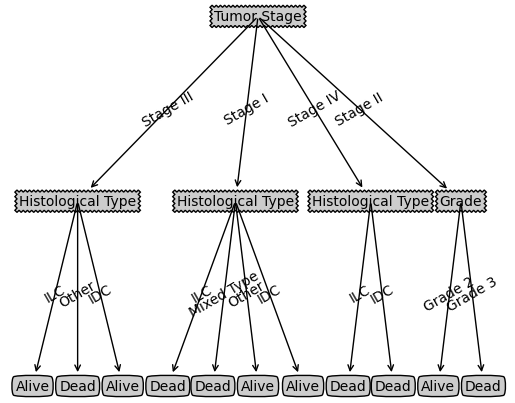

Actual labels:['died', 'alive', 'alive', 'died', 'alive', 'died', 'died', 'alive', 'died', 'alive']
Predicted labels:['died' 'alive' 'died' 'died' 'died' 'alive' 'died' 'alive' 'died' 'alive']
Accuracy:0.73


In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def evaluate(clf, X_test, y_test):
    # Predict on the test data
    y_pred = clf.predict(X_test)
    # Evaluate the model performance
    print(f"Actual labels:{y_test.tolist()[0:10]}")
    print(f"Predicted labels:{y_pred[0:10]}")
    print(f"Accuracy:{accuracy_score(y_test, y_pred):.2f}")


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
# for id3 as well as sklearn decision tree (use sklearn Decision Tree classifier with entropy criterion)
clf_skl = DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf_skl.fit(X_train, y_train)

# Build the decision tree using the ID3 algorithm
#decision_tree = id3(data, features, target, max_depth=2)

# Print the resulting decision tree
print("Decision Tree:")
#plot results
plotter.print_tree(decision_tree)
plotter.create_plot(decision_tree)
# fit the model
# print tree from fitted model
# evaluate model
evaluate(clf_skl, X_test, y_test)


## Explaination
The accuracy are not very high at sklearn and my_classifier_id3 is because the feature negineering(featrues sections or I need to create some new features here) are not enough.  But due to my limited understanding of the features,so I  am not sure how to create new features. 

 ---
 <a name='06'></a>
 ## Part F. Development of the classifier classes
 
When you are satisfied with your developed code snippets you can build a python file (No notebook!!!) with the classifier classes. Use your Object Oriented programming skills to compose the classes with at least the methods `fit()` and `predict()`.  The method `fit()` should fit the best algorithm and the method `predict()` should predict the class. 

### <span style="background-color: lightyellow;">Development Task</span>
- Submit a repository with a directory `classification` that includes:
  - This finished notebook and supportive code snippets
  - The code solutions (python files) that contain the classifier code. Consider to use an abstract base class that is extended by specific classifiers. Deliver code solutions for:  
    - The Gaussian Naive Bayes classifier
    - The Bernouilli Naive Bayes classsifier (optional)
    - The ID3 classifier
  - An evaluation document that details specific scenarios or datasets where each developed type is appropriate or inappropriate.


### Additional notes
- Code quality and readability are important, so adhere to best practices in coding and documentation.
- See also the additional notes in the beginning of this notebook


In [101]:
class CustomGaussianNB:
    def __init__(self):
        self.labels = None
        self.mu = None
        self.sd = None
        self.priors = None

    def fit(self, X_train, y_train):
        """Fit the model to training data"""
        self.labels = self.get_labels(y_train)
        self.priors = self.get_priors(y_train)
        self.mu, self.sd = self.get_likelihoods(X_train, y_train)
        return self

    def get_labels(self,y_train):
        """ Extract unique class labels from the training data """
        labels = np.unique(y_train)
        return labels
    
    def get_priors(self,y_train):
        """ Calculate prior probabilities for each unique label """
        priors = []
        total_samples = len(y_train)
        for label in self.labels:
            Pi = np.sum(y_train == label) / total_samples
            priors.append(Pi)
        return priors
    
    def get_likelihoods(self, X_train, y_train):
        """ Calculate mean and stdev matrices size (n_labels, n_features) """
        n_features = X_train.shape[1]
        n_labels = len(self.labels)
        mu = np.zeros((n_labels, n_features))
        sd = np.zeros((n_labels, n_features))
        for idx, label in enumerate(self.labels):
            for j in range(n_features):
                mu[idx][j] = np.mean(X_train[y_train == label, j])
                sd[idx][j] = np.std(X_train[y_train == label, j])
        return mu, sd  

    def predict_proba(self,X_test):
        '''Compute Gaussian Naive Bayes probabilities via likelihoods.'''
        Pyx = []
        for c in range(len(self.labels)):
            Pxy = np.exp(-0.5 * (X_test - self.mu[c]) ** 2 / (self.sd[c]**2)) / np.sqrt(2.0 * np.pi * (self.sd[c]**2))
            Py = self.priors[c]
            Pyx.append(Pxy.prod(axis=1) * Py)
        Pyx = np.array(Pyx).T
        return Pyx / Pyx.sum(axis=1, keepdims=True)
    
    def predict(self, X_test):
        """ Predict class labels for the test data """
        return np.argmax(self.predict_proba(X_test), axis=1)

In [102]:
class CustomBernoulliNB:
    '''Bernoulli Naive Bayes is designed for binary/boolean features (0 or 1). 
    It uses the Bernoulli distribution to model the features.'''
    def __init__(self):
        self.class_priors = None
        self.cond_probs = None
        self.classes = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        self.class_priors = np.zeros(n_classes)
        self.cond_probs = np.zeros((n_classes, n_features))
        
        for idx, cls in enumerate(self.classes):
            # Get indices of samples belonging to the current class
            X_cls = X[y == cls]
            self.class_priors[idx] = X_cls.shape[0] / n_samples
            
            # Calculate conditional probabilities for each feature
            for feature in range(n_features):
                # P(X_i | Y = c) = (count of feature=1 in class c + 1) / (count of class c + 2)
                self.cond_probs[idx, feature] = (np.sum(X_cls[:, feature]) + 1) / (X_cls.shape[0] + 2)

    def predict(self, X):
        # Calculate log probabilities for each class
        log_probs = np.log(self.class_priors) + X @ np.log(self.cond_probs.T) + (1 - X) @ np.log(1 - self.cond_probs.T)
        
        # Return the class with the highest log probability
        return self.classes[np.argmax(log_probs, axis=1)]

# Example usage
if __name__ == "__main__":

    X_train = np.array([[1, 0, 1],
                        [0, 1, 1],
                        [1, 1, 0],
                        [0, 0, 1]])
    y_train = np.array([0, 1, 0, 1])

    classifier = CustomBernoulliNB()
    classifier.fit(X_train, y_train)

    X_test = np.array([[1, 0, 0],
                       [0, 1, 0]])
    predictions = classifier.predict(X_test)
    print("Predictions:", predictions)

Predictions: [0 1]


In [103]:
class ClassifierID3:
    def __init__(self, max_depth=None, criterion='entropy'):
        self.max_depth = max_depth
        self.criterion = criterion

    criteria = {
        'gini': lambda p: 1.0 - np.sum(p ** 2),
        'entropy': lambda p: np.sum(-p * np.log2(np.maximum(p, 1e-100)))
    }

    def fit(self, X_train, y_train):
        classes = np.unique(y_train)
        y_onehot = (y_train[:, np.newaxis] == classes).astype(float)
        self.best_feature, self.best_threshold = self.determine_split(X_train, y_onehot)
        self.classes_ = classes
        return self

    def determine_split(self, X_train, y_onehot):
        """Determine an optimal split feature and threshold from training data."""
        cost_function = self.__class__.criteria[self.criterion]
        best_feature = best_threshold = None
        best_cost = cost_function(y_onehot.mean(axis=0))
        
        for feature in range(X_train.shape[1]):
            ordered = np.unique(X_train[:, feature])
            for threshold in (ordered[:-1] + ordered[1:]) / 2.0:
                subset = (X_train[:, feature] <= threshold)
                fraction = subset.mean()
                cost = (fraction * cost_function(y_onehot[subset, :].mean(axis=0)) +
                        (1.0 - fraction) * cost_function(y_onehot[~subset, :].mean(axis=0)))
                
                if cost < best_cost:
                    best_feature, best_threshold, best_cost = feature, threshold, cost
                    
        return best_feature, best_threshold

    def predict_proba(self, X_train, y_train, X_test):
        """Trains a decision stump and predicts class probabilities for test data."""
        classes = np.unique(y_train)
        y_onehot = (y_train[:, np.newaxis] == classes).astype(float)
        feature, threshold = self.determine_split(X_train, y_onehot)
        subset_test = (X_test[:, feature] <= threshold)
        
        y_proba = np.empty((X_test.shape[0], len(classes)))
        y_proba[subset_test, :] = y_onehot[X_train[:, feature] <= threshold].mean(axis=0)
        y_proba[~subset_test, :] = y_onehot[X_train[:, feature] > threshold].mean(axis=0)
        
        return y_proba

    def predict(self, X_train, y_train, X_test):
        """Predicts class labels for test data."""
        y_proba = self.predict_proba(X_train, y_train, X_test)
        return np.argmax(y_proba, axis=1)

---
 <a name='07'></a>
## Part G. BONUS: Split on treshold
We used the ID3 algorithm to determine the best feature to split on. Modify the algorithm to split based on specific threshold values, similar to how the scikit-learn decision tree algorithm allows splitting on conditions like this.

## Part H. BONUS: implement KNN algorithm
In this bonus assignment, you will have the opportunity to delve deeper into the world of machine learning by implementing the K-Nearest Neighbors (KNN) algorithm from scratch. KNN is a simple yet powerful classification algorithm that makes predictions based on the majority class among the closest data points in the feature space. This hands-on exercise will enhance your understanding of how distance metrics, such as Euclidean distance, are used to measure similarity between data points, and how the choice of k (the number of neighbors) impacts the model's performance. Before you begin coding, familiarize yourself with the KNN algorithm to ensure you understand the key concepts and mechanics behind it. Once you have a solid understanding, your task will be to create a class that encapsulates the KNN algorithm, implementing methods for training (fitting the model) and making predictions. 


In [104]:
class KNN():

    def __init__(self,k=1):
        self.k = k
        self.classes = None
        self.X_trian = None
        self.y_trian_onehot = None

    def __repr__(self):
        return f'KNearestNeighbors(n_neighbors={self.k})'

    def fit(self,X,y):
        self.classes = np.unique(y)
        self.X_trian = X
        self.y_onehot = (y[:,np.newaxis]==self.classes)
        return self

    def predict_proba(self,X):
        probas = [ ]
        for instance in X:
            #claulate all points distance to everypoints in X
            distances2 = [ ]
            for point in self.X_trian:
                distance = np.sum((x1-x2)**2 for x1,x2 in zip(point,instance))
            distances2.append(distance)
            #sort the distances and determine the distance of the K'th smallest one
            threshold = sorted(distances2)[self.k - 1]
            #calculate the distribution of class labels among neighbors with distance <= threshold
            neighbor_labels = self.y_train[distances2 <= threshold]
            # eg: neighbors_labels = [2,2,1,1,2]  > [0.0,0.4,0.6]
            y_onehot = (np.array([neighbor_labels]).T == self.classes)
            probabilities = np.mean(y_onehot,axis=0)
            y_probas.append(probabilities)
        y_probas = np.array(y_probas)
        return y_probas

    def predict(self,X):
        return self.classes[np.argmax(self.predict_proba(X),axis=1)]

---
## References: 


The study of Taggart is a nice example of the usage of the ID3 algorithm. The ID3 algorithm classified and predicted branchpoint sites in pre-mRNA transcripts. The study identified key sequence motifs and positional features that are indicative of branchpoints. You can read about the study [here]https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3465671/. [2]


[1] Pereira et al. Nat Commun 2016, Rueda et al. Nature 2019, Curtis et al. Nature 2012<br></br>

[2] Taggart AJ, DeSimone AM, Shih JS, Filloux ME, Fairbrother WG. Large-scale mapping of branchpoints in human pre-mRNA transcripts in vivo. Nat Struct Mol Biol. 2012 Jun 17;19(7):719-21. doi: 10.1038/nsmb.2327. PMID: 22705790; PMCID: PMC3465671.

[3] Quinlan, J. R. 1986. Induction of Decision Trees. Mach. Learn. 1, 1 (Mar. 1986), 81–106